In [2]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import re #used as a regular expression to find particular patterns and process it
import string #used to obtain information in the string and manipulate the string overall
import warnings
import re
from wordcloud import WordCloud
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


import re


%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hiteshnirola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
DATASET_COLUMNS=['target','ids','date','query','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/Users/hiteshnirola/Downloads/Sentimentanalysis.csv', \
                 encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.tail(5)

,target,ids,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [5]:
np.sum(df.isnull().any(axis=1))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
# Postive review is marked as 4, changing it to 1 and Negative review is 0.

df['target'] = df['target'].replace(4,1)

target
Negative    800000
Positive    800000
Name: count, dtype: int64


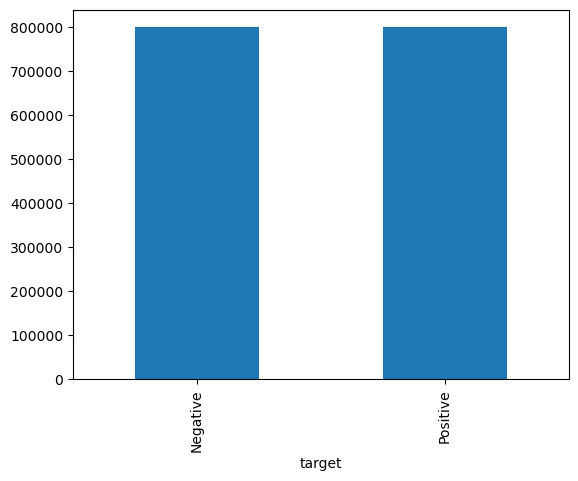

In [7]:
# Visualising the distribution of the target variable.

sentiment = {0:"Negative", 1:"Positive"}
print(df.target.apply(lambda x: sentiment[x]).value_counts())
df.target.apply(lambda x: sentiment[x]).value_counts().plot(kind = 'bar')
plt.show()

In [8]:
# Aim is to find a sentiment of the text based on the tweet, for this only target and text are enough.

data=df[['text','target']]
data.head(2)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0


In [9]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

data_pos = data_pos.iloc[:int(25000)]
data_neg = data_neg.iloc[:int(25000)]

dataset = pd.concat([data_pos, data_neg])

print(len(dataset))
dataset.head(2)

50000


,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1


In [10]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

24995    is sad that it is raining... no softball for m...
24996                               last day of vacation. 
24997    good morning! its a beautiful day, too bad i'm...
24998    night all. love yas. hahahahahah btw... vodka ...
24999       why do i have to go back to school tomorrow?? 
Name: text, dtype: object

In [42]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
import tensorflow as tf





print("Tensorflow Version", tf.__version__)
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hiteshnirola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tensorflow Version 2.16.1


In [43]:
# Removing Stopwords

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()

24995                               raining softball today
24996                                        last vacation
24997    good morning beautiful gonna spending majority...
24998                night love yas hahahahahah vodka evil
24999                                 back school tomorrow
Name: text, dtype: object

In [44]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer() 

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

NLTK stop word lists 

{'weren', "wasn't", 'm', 'aren', 'being', 'me', 'and', 'theirs', 're', 'your', 'hers', 'few', 'have', 'am', 'itself', 'but', 'up', 'under', 'where', 'will', 'd', 'by', 'the', 'whom', 'any', 'more', 'needn', 'is', 'having', 'only', 'she', 'than', 'you', 'they', 'when', 'ours', 'with', 'into', "you'd", 'my', 'that', 'has', 's', 'ain', "couldn't", 'again', 'them', "she's", "shan't", "hadn't", 'his', 'y', 'their', 'not', 'between', 'i', 'had', 'were', 'isn', 'if', 'against', 'why', 'haven', 'we', 'some', 'was', 'further', 'hadn', 'doing', 'there', 'most', "haven't", 'which', "you're", 'in', 'before', 'o', 'these', 'all', "weren't", 'don', 'does', 'to', 'doesn', 'or', 'so', 'each', 'are', "needn't", 'should', "aren't", 've', 'because', 'for', 'what', 'now', "should've", "it's", 'himself', 't', 'yours', 'until', 'on', 'hasn', 'above', 'him', 'other', 'it', 'yourselves', 'as', 'same', 'its', 'while', "shouldn't", 'this', 'out', 'do', "isn't", 'from', 'won', 'our', "that

In [45]:
dataset['text']=dataset['text'].apply(remove_stopwords)
dataset['text'].tail()

24995                               raining softball today
24996                                        last vacation
24997    good morning beautiful gonna spending majority...
24998                night love yas hahahahahah vodka evil
24999                                 back school tomorrow
Name: text, dtype: object

In [46]:
# removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

800000                                        love guy best
800001          meeting besties tonight cant wait girl talk
800002      thanks twitter sunisa meet show area sweetheart
800003    sick really cheap hurt much real food plus fri...
800004                                      effect everyone
Name: text, dtype: object

In [47]:
# removing numbers 

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

800000                                        love guy best
800001          meeting besties tonight cant wait girl talk
800002      thanks twitter sunisa meet show area sweetheart
800003    sick really cheap hurt much real food plus fri...
800004                                      effect everyone
Name: text, dtype: object

In [48]:
# fucntion to removes pattern in the input text.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [49]:
# remove twitter handles (@user)

dataset['text'] = np.vectorize(remove_pattern)(dataset['text'], "@[\w]*")
dataset.head()

,text,target
800000,love guy best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurt much real food plus fri...,1
800004,effect everyone,1


In [50]:
# remove special characters, numbers and punctuations

dataset['text'] = dataset['text'].str.replace("[^a-zA-Z#]", " ")
dataset.head()

,text,target
800000,love guy best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurt much real food plus fri...,1
800004,effect everyone,1


In [51]:
# remove short words

dataset['text'] = dataset['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
dataset.head()

,text,target
800000,love best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurt much real food plus fri...,1
800004,effect everyone,1


In [52]:
# Tokenizing the text

tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000                                         [love, best]
800001    [meeting, besties, tonight, cant, wait, girl, ...
800002    [thanks, twitter, sunisa, meet, show, area, sw...
800003    [sick, really, cheap, hurt, much, real, food, ...
800004                                   [effect, everyone]
Name: text, dtype: object

In [53]:
# Applying Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                                         [love, best]
800001    [meeting, besties, tonight, cant, wait, girl, ...
800002    [thanks, twitter, sunisa, meet, show, area, sw...
800003    [sick, really, cheap, hurt, much, real, food, ...
800004                                   [effect, everyone]
Name: text, dtype: object

In [54]:
# Applying Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hiteshnirola/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hiteshnirola/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,target
800000,love best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurt much real food plus fri...,1
800004,effect everyone,1


In [55]:
# Input Feature and Label

X = dataset.text
y = dataset.target


In [56]:
# Splitting our data into Train and Test

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [57]:
# TFIDF : Extracting Tf-idf features

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=1000, stop_words='english')

tfidf.fit(list(X_train) + list(X_val))
X_train_tfidf = tfidf.transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [58]:
# Count Vector approach (Bag of words approach)
# PS: We are not building any models using this approach as we are doing with Tf-IDF.

from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
count_vec.fit(list(X_train) + list(X_val))

X_train_count_vec = count_vec.transform(X_train)
X_val_count_vec = count_vec.transform(X_val)

In [59]:
scores_dict_tfid = {}


In [60]:
# Naive bayes using Tf-idf features

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred_nb, y_val))

naive bayes tfidf accuracy 0.55672


In [61]:
scores_dict_tfid['Multinomial Naive Bayes(Tfid)'] = accuracy_score(y_pred_nb, y_val)


<Axes: >

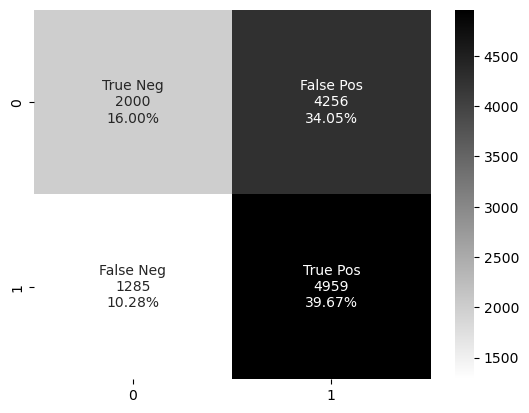

In [62]:
cf_matrix_model = confusion_matrix(y_val, y_pred_nb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_model.flatten()/np.sum(cf_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_model, annot=labels, fmt='', cmap='binary')

In [63]:
# Random Forest using Tf-idf features

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf,y_train)
y_pred_rf = rf.predict(X_val_tfidf)
print('Random forest tfidf accuracy %s' % accuracy_score(y_pred_rf, y_val))

Random forest tfidf accuracy 0.5712


In [64]:
scores_dict_tfid['Random Forest(tfid)'] = accuracy_score(y_pred_rf, y_val)


<Axes: >

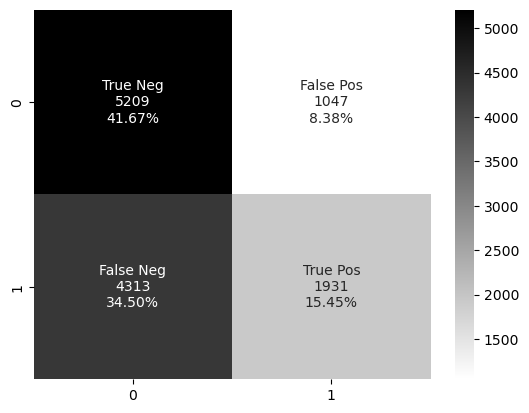

In [65]:
cf_matrix_model = confusion_matrix(y_val, y_pred_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_model.flatten()/np.sum(cf_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_model, annot=labels, fmt='', cmap='binary')

In [66]:
# Random forest seems working well, but to get better result, we need to try with complete data and further analysis.

scores_dict_tfid

{'Multinomial Naive Bayes(Tfid)': 0.55672, 'Random Forest(tfid)': 0.5712}